# 군집분석 (Clustering)
비지도 학습으로 비슷한 특성을 가지는 데이터들끼리 묶어 샘플에 잠재되어 있는 그룹을 식별한다. 

- 고객 세분화
- 토픽 분류



## k-mean (K-평균)
- 가장 널리 사용되는 군집 알고리즘 중 하나.
- 데이터셋을 K의 군집으로 나눈다. K는 하이퍼파라미터로 사용자가 지정한다.
- 군집의 중심이 될 것 같은 임의의 지점(Centroid)을 선택해 해당 중심에 가장 가까운 포인드들을 선택하는 기법.

### 알고리즘 이해
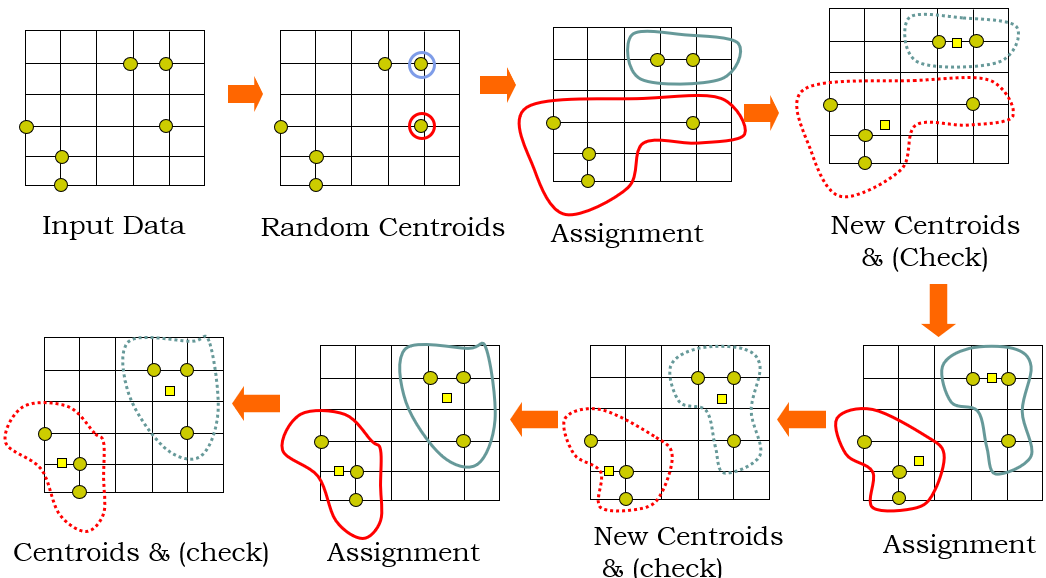

<center>출처 : http://ai-times.tistory.com/158</center>


### 특징
- K-mean은 군집을 원 모양으로 간주 한다.
- 모든 특성은 동일한 Scale을 가져야 한다. 
- 이상치에 취약하다.

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [5]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [6]:
from sklearn.cluster import KMeans

In [9]:
# 하이퍼파라미터 - n_cluster=k(군집개수)
kmean=KMeans(n_clusters=3)
kmean.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
#  샘플별로 분류한 cluster 번호 0,1,2.. (임의로 결정됨, 결과 번호에 따른 군집정보는 사용자가 직접 찾아야 함)
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
new_data=[[0.1, 0.54, 0.23, 0.7]]  # 여러개의 데이터를 줄 수 있도록 무조건 2차원으로 생성해야함
n_cluster=kmean.predict(new_data)
n_cluster

array([1])

In [26]:
# df=pd.DataFrame(X, columns=iris.feature_names)
df=pd.DataFrame()
df['y']=y
df['cluster']=kmean.labels_  # cluster 결과 번호에 따른 군집정보는 사용자가 직접 찾아야 함
df.head()

,y,cluster
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
df.groupby(['y','cluster'])['sepal length (cm)'].count()

y  cluster
0  0          50
1  1          47
   2           3
2  1          14
   2          36
Name: sepal length (cm), dtype: int64

In [22]:
df['cluster'].value_counts()  # 각 군집에 모인 샘플의 개수

1    61
0    50
2    39
Name: cluster, dtype: int64

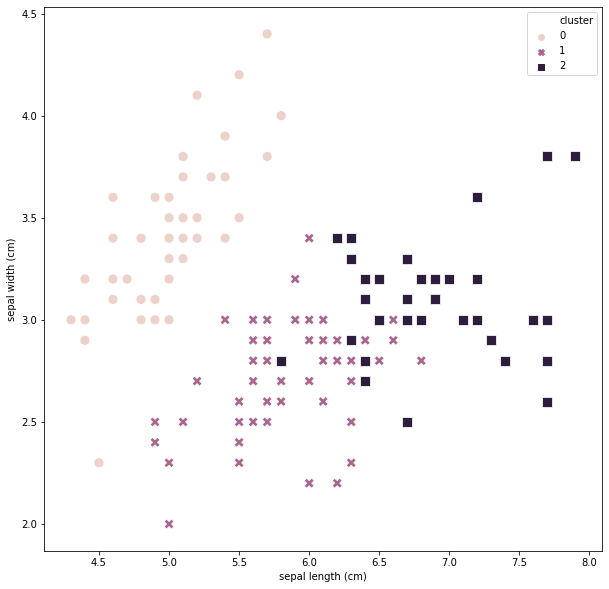

In [25]:
plt.figure(figsize=(10,10), facecolor='w')
sns.scatterplot(x='sepal length (cm)',
                y='sepal width (cm)',
                hue='cluster',
                data=df,
                style=df['cluster'],
                s=100)
plt.show()

## Inertia value를 이용한 적정 군집수 판단
- inertia 
    - 군집내 데이터들과 중심간의 거리의 합으로 군집의 응집도를 나타내는 값이다.
    - 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다
    - KMean의 inertia_ 속성으로 조회할 수 있다.
    - 군집 단위 별로 inertia 값을 조회한 후 급격히 떨어지는 지점이 적정 군집수라 판단 할 수 있다.

In [27]:
kmean.inertia_

6.982216473785234

In [36]:
inertia_list=[]
for k in range(2, 11): # range(): 군집수 후보
    model=KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertia_list.append(model.inertia_)

In [37]:
inertia_list

[12.127790750538194,
 6.982216473785234,
 5.516933472040371,
 4.58977540011789,
 3.988303818502381,
 3.473317787785053,
 3.227974009711552,
 2.809676017197469,
 2.555682489002655]

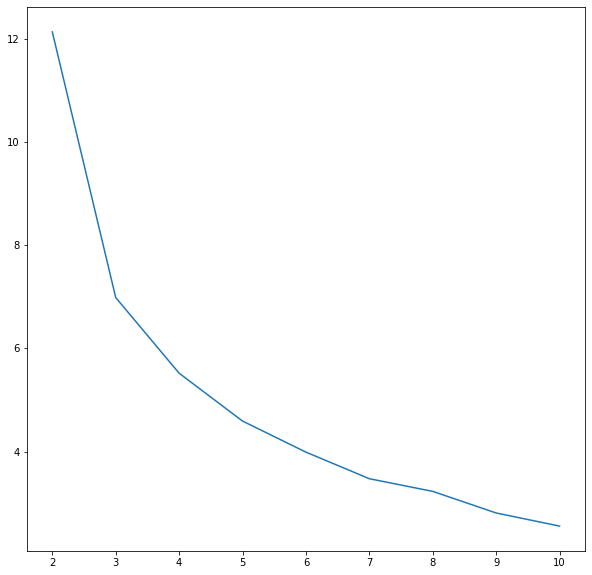

In [38]:
plt.figure(figsize=(10,10), facecolor='w')  # 급격히 감소하는 구간을 찾는다 이 데이터의 경우 3 정도가 적정한 군집임
plt.plot(range(2,11), inertia_list)
plt.show()

### 평가 : 실루엣 지표

- 실루엣 계수 (silhouette coefficient)
    - 개별 관측치가 해당 군집 내의 데이터와 얼마나 가깝고 가장 가까운 다른 군집과 얼마나 먼지를 나타내는 지표 (응집력을 거리를 이용하여 수치화 한 것)
    - -1 ~ 1 사이의 값을 가지며 1에 가까울 수록 좋은 지표이다. (0에 가까울수록 다른 군집과 가까움을 나타낸다. 음수인 경우 같은 군집보다 다른 군집과 더 가깝다는 의미)
- silhouette_samples()
    - 개별 관측치의 실루엣 계수 반환
- silhouette_score()
    - 실루엣 계수들을의 평균
- 좋은 군집화의 지표
    - 실루엣 계수 평균이 1에 가까울수록 좋다.
    - 실루엣 계수 평균과 개별 군집의 실루엣 계수 평균의 편차가 크지 않아야 한다.

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [43]:
s_coef=silhouette_samples(X_scaled, kmean.labels_)
s_coef.size

150

In [45]:
s_coef.mean()  # 평균을 이용하여 군집의 대표값을 뽑는다

0.5047687565398589

In [46]:
silhouette_score(X_scaled, kmean.labels_)  # 평균(대표값)

0.5047687565398589

## n_clusters 별 실루엣 점수 확인

In [47]:
df=pd.DataFrame()
df['cluster']=kmean.labels_
df['coef']=silhouette_samples(X_scaled, kmean.labels_)
df.head()

,cluster,coef
0,0,0.793475
1,0,0.709731
2,0,0.762378
3,0,0.725732
4,0,0.786929


In [48]:
df.groupby('cluster')['coef'].mean()  # 1에 가까울수록 동일 군집의 응집력이 강함

cluster
0    0.717918
1    0.395551
2    0.402328
Name: coef, dtype: float64